<a href="https://colab.research.google.com/github/jmora67248-ui/Ciencia-de-datos/blob/main/Tarea_de_15septclase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agenda
1. Definir cenceptos
2. Cargar datos desde drive
3. Calculo de la desviación estándar
4. Exploracion de distribucion de datos (graficos)


##1. Definicion de conceptos
1.1 Varianza
1..2 Desnviacion estandar
1.3 Desviacion de la media absoluta
1.4 Desnviacción absoluta mediana de la mediana (MAD)
1.5 Rango
1.6 Estadistica ordinal
1.7 Percentil
1.8 Rango intercualtil (IQR)


##1.1 Varianza
Es una medida de dispersión que representa la variabilidad de una serie de datos respecto a su media. Se calcula como la suma de los cuadrados de las desviaciones de cada dato con respecto a la media, dividida por el número total de observaciones.

##1.2 Desviación Estándar
Indica qué tan dispersos están los datos con respecto a la media. Es simplemente la raíz cuadrada positiva de la Varianza. Un valor bajo sugiere que los datos tienden a estar cerca de la media, mientras que un valor alto indica mayor dispersión.

##1.3 Desviación Media Absoluta
Mide la dispersión promedio de un conjunto de datos. Se calcula como el promedio de las desviaciones absolutas de cada dato con respecto a la media, ofreciendo una visión directa de la distancia promedio de los puntos al centro de la distribución.

##1.4 Desviación Absoluta Mediana (MAD)
Es una medida robusta de la variabilidad de los datos, menos sensible a valores atípicos. Representa la mediana de las desviaciones absolutas de cada dato con respecto a la mediana del conjunto, ofreciendo una alternativa estable a la desviación estándar.

##1.5 Rango
Es la medida de dispersión más simple. Se calcula como la diferencia entre el valor máximo y el valor mínimo en un conjunto de datos. Ofrece una idea rápida de la amplitud total de los datos, aunque es muy sensible a valores extremos.

##1.6 Estadística Ordinal
Se refiere a estadísticas basadas en el orden de los datos, desde el más pequeño hasta el más grande. Estas métricas, como la mediana o los percentiles, son robustas y no se ven tan afectadas por valores atípicos como las basadas en la media.

##1.7 Percentil
Es una medida de posición que indica el valor por debajo del cual se encuentra un porcentaje determinado de las observaciones. Por ejemplo, el percentil 80 es el valor que supera al 80% de los datos del conjunto.

##1.8 Rango Intercuartílico (IQR)
Mide la dispersión del 50% central de los datos. Se calcula como la diferencia entre el tercer cuartil (percentil 75) y el primer cuartil (percentil 25). Es una medida de variabilidad robusta, útil para identificar valores atípicos.

In [1]:
!pip install statsmodels
!pip install wquantiles


In [2]:
!pip install wquantiles

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
#from scipy import trim_mean
import matplotlib.pyplot as plt
from statsmodels import robust
import wquantiles
from google.colab import files



In [4]:
# Subir archivo CSV
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Leer archivo CSV
data  = pd.read_csv(filename)



Saving crocodile_dataset.csv to crocodile_dataset.csv


In [5]:
data.columns

Index(['Observation ID', 'Common Name', 'Scientific Name', 'Family', 'Genus',
       'Observed Length (m)', 'Observed Weight (kg)', 'Age Class', 'Sex',
       'Date of Observation', 'Country/Region', 'Habitat Type',
       'Conservation Status', 'Observer Name', 'Notes'],
      dtype='object')

In [8]:
Mayor_longitud= data.groupby(["Age Class"])["Observed Length (m)"].max()
Mayor_longitud

,Observed Length (m)
Age Class,
Adult,6.12
Hatchling,0.82
Juvenile,3.65
Subadult,5.10


In [9]:
data.describe()

,Observation ID,Observed Length (m),Observed Weight (kg)
count,1000.000000,1000.000000,1000.000000
mean,500.500000,2.415110,155.771900
std,288.819436,1.097542,175.186788
min,1.000000,0.140000,4.400000
25%,250.750000,1.637500,53.225000
50%,500.500000,2.430000,100.600000
75%,750.250000,3.010000,168.875000
max,1000.000000,6.120000,1139.700000


In [10]:
#Calculando la desviacion estandar y los cuartiles
data["Observed Length (m)"].std()

1.097542248338026

In [11]:
data["Observed Weight (kg)"].std()

175.18678806091816

In [12]:
robust.scale.mad(data["Observed Weight (kg)"])

np.float64(81.83964246150921)

In [14]:
#Calcular el IQR
data["Observed Weight (kg)"].quantile(0.75) - data["Observed Weight (kg)"].quantile(0.25)

np.float64(115.65)

In [15]:
#Calcular el IQR de la tasa de asesinatos
data["Observed Length (m)"].quantile(0.75) - data["Observed Length (m)"].quantile(0.25)

np.float64(1.3724999999999998)

In [16]:
robust.scale.mad(data["Observed Length (m)"])

np.float64(0.9785174642136968)

In [17]:
#Calcular el MAD de la tasa de asesinatos
robust.scale.mad(data["Observed Length (m)"])

np.float64(0.9785174642136968)

In [18]:
data.columns

Index(['Observation ID', 'Common Name', 'Scientific Name', 'Family', 'Genus',
       'Observed Length (m)', 'Observed Weight (kg)', 'Age Class', 'Sex',
       'Date of Observation', 'Country/Region', 'Habitat Type',
       'Conservation Status', 'Observer Name', 'Notes'],
      dtype='object')

In [19]:
nuevos_nombres = {
    'Observation ID': 'ID de Observación',
    'Common Name': 'Nombre Común',
    'Scientific Name': 'Nombre Científico',
    'Family': 'Familia',
    'Genus': 'Género',
    'Observed Length (m)': 'Longitud Observada (m)',
    'Observed Weight (kg)': 'Peso Observado (kg)',
    'Age Class': 'Clase de Edad',
    'Sex': 'Sexo',
    'Date of Observation': 'Fecha de Observación',
    'Country/Region': 'País/Región',
    'Habitat Type': 'Tipo de Hábitat',
    'Conservation Status': 'Estado de Conservación',
    'Observer Name': 'Nombre del Observador',
    'Notes': 'Notas'
}

# Usamos el método .rename() para aplicar los cambios
data = data.rename(columns=nuevos_nombres)

# Opcional: Imprime las nuevas columnas para verificar que el cambio se realizó
print("Columnas actualizadas:")
print(data.columns)

Columnas actualizadas:
Index(['ID de Observación', 'Nombre Común', 'Nombre Científico', 'Familia',
       'Género', 'Longitud Observada (m)', 'Peso Observado (kg)',
       'Clase de Edad', 'Sexo', 'Fecha de Observación', 'País/Región',
       'Tipo de Hábitat', 'Estado de Conservación', 'Nombre del Observador',
       'Notas'],
      dtype='object')


4.EXPLORACION EN LA DISTRIBUCION DE DATOS

4.1 Diagrama de caja (poner definicion e indicar como se lee)

4.2 Diagrama de frecuencias

4.3 Histograma

4.4 Diagrama de densidad

##Diagrama de Caja (Box Plot)
Definición: Es un gráfico que representa visualmente la distribución de datos numéricos a través de sus cuartiles. Es muy útil para identificar rápidamente la mediana, la dispersión y los valores atípicos.

Cómo se lee: La caja central contiene el 50% de los datos (el Rango Intercuartílico). La línea interior es la mediana. Los "bigotes" se extienden hasta los datos no atípicos, y los puntos fuera de ellos son considerados valores extremos.


##Diagrama de Frecuencias
Es un gráfico, usualmente de barras, que muestra la cantidad de veces que aparece cada categoría o valor en un conjunto de datos. Es ideal para visualizar la distribución de variables cualitativas o discretas y comparar la popularidad entre diferentes grupos.


##Histograma
Representa la distribución de frecuencia de datos numéricos continuos. Agrupa los datos en intervalos de igual tamaño (llamados "bins") y grafica una barra por cada intervalo, cuya altura indica cuántos valores caen dentro de él, revelando la forma de la distribución.

##Diagrama de Densidad
Es una versión suavizada y continua de un histograma. Representa la distribución de datos mediante una curva, lo que facilita la visualización de la forma de la distribución, especialmente picos y valles, al estimar la probabilidad de encontrar un valor.



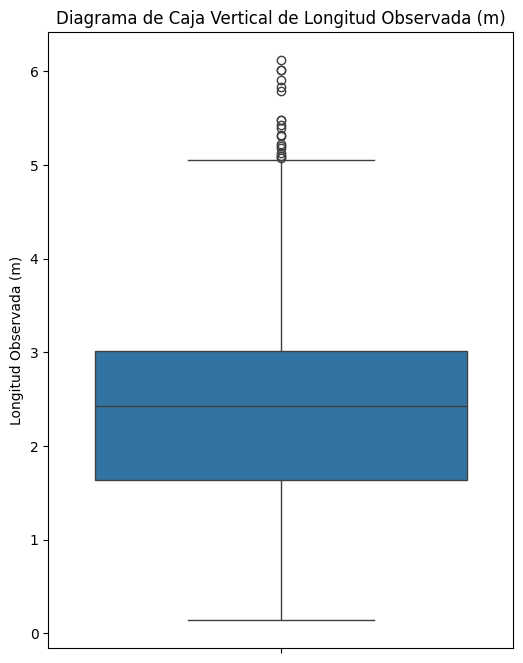

In [41]:
# --- Código para el gráfico vertical ---
plt.figure(figsize=(6, 8)) # Define el tamaño (ancho, alto)
sns.boxplot(y=data['Longitud Observada (m)']) # La clave es usar 'y' en lugar de 'x'
plt.title('Diagrama de Caja Vertical de Longitud Observada (m)') # Título del gráfico
plt.ylabel('Longitud Observada (m)') # Cambiamos la etiqueta a 'ylabel'
plt.show() # Muestra el gráfico

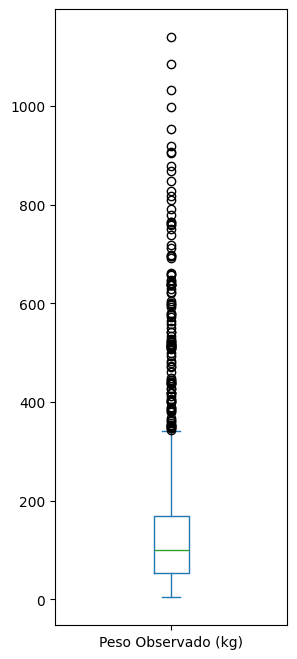

In [28]:
# --- 4.1 Código para el Diagrama de Caja ---

ax=(data["Peso Observado (kg)"]).plot.box(figsize=(3,8))
ax.set_label('Peso Observado (kg)')

In [30]:
#Calculo de la tabla de frecuencia e histograma
binnedPopulation = pd.cut(data["Peso Observado (kg)"],10)
binnedPopulation.value_counts()

,count
Peso Observado (kg),
"(3.265, 117.93]",579
"(117.93, 231.46]",260
"(231.46, 344.99]",47
"(344.99, 458.52]",36
"(458.52, 572.05]",29
"(572.05, 685.58]",21
"(685.58, 799.11]",14
"(799.11, 912.64]",8
"(912.64, 1026.17]",3


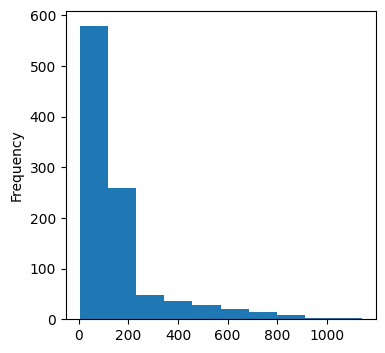

In [44]:
ax = (data["Peso Observado (kg)"]).plot.hist(figsize = (4,4))
ax.set_label("Peso Observado (kg)")


Text(0.5, 1.0, 'Histograma y Curva de Densidad de Peso Observado (kg)')

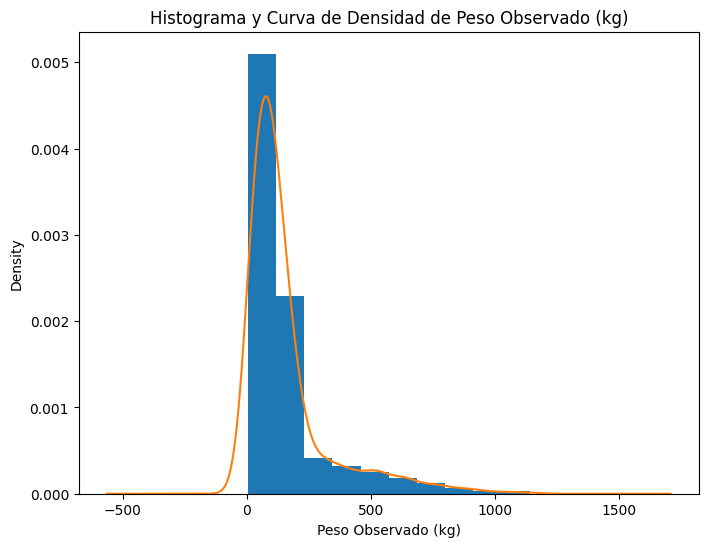

In [39]:
#diagrama de dispersion y curva de densidad
ax = data["Peso Observado (kg)"].plot.hist(density = True, figsize = (8, 6))
data["Peso Observado (kg)"].plot.density(ax = ax)
ax.set_xlabel("Peso Observado (kg)")
ax.set_title("Histograma y Curva de Densidad de Peso Observado (kg)")

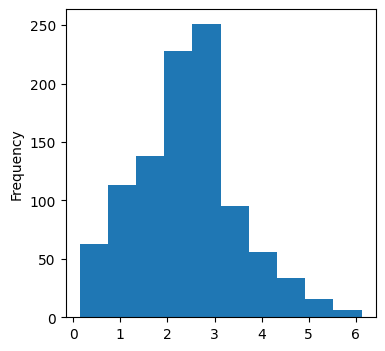

In [45]:
ax = (data["Longitud Observada (m)"]).plot.hist(figsize = (4,4))
ax.set_label("Longitud Observada (m)")

Text(0.5, 1.0, 'Histograma y Curva de Densidad de laLongitud Observada (m)')

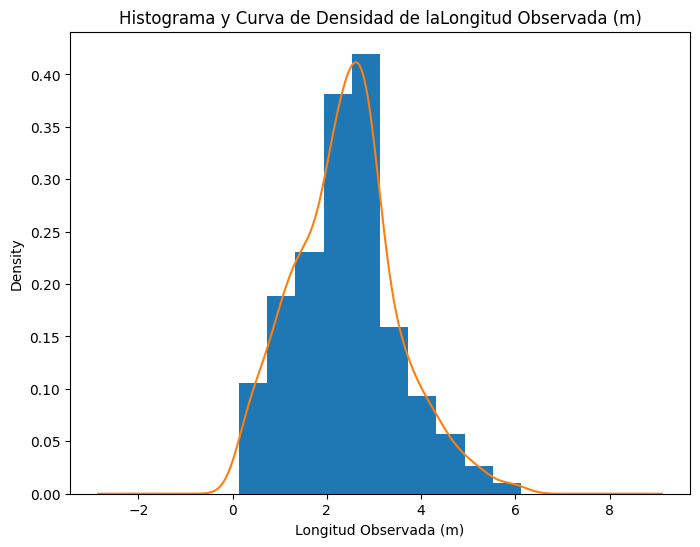

In [46]:
#diagrama de dispersion y curva de densidad
ax = data["Longitud Observada (m)"].plot.hist(density = True, figsize = (8, 6))
data["Longitud Observada (m)"].plot.density(ax = ax)
ax.set_xlabel("Longitud Observada (m)")
ax.set_title("Histograma y Curva de Densidad de laLongitud Observada (m)")